In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Install the ultralytics package using pip
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 kB 5.1 MB/s eta 0:00:00


In [5]:
from ultralytics import YOLO

In [6]:
%cd /content/drive/MyDrive/yolov8

/content/drive/MyDrive/yolov8


In [7]:
%cd /content/drive/MyDrive/yolov8
!rm data/TheSV.yaml
!echo 'train: ../data' >> data/TheSV.yaml
!echo 'val: ../data' >> data/TheSV.yaml
!echo 'nc: 6' >> data/TheSV.yaml
!echo "names: ['UITStudentCard','name','year','faculty','ID','Face']" >> data/TheSV.yaml

/content/drive/MyDrive/yolov8


In [8]:
model = YOLO('yolov8n.pt')
result = model.train(data='/content/drive/MyDrive/yolov8/data/TheSV.yaml',epochs=20)

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/yolov8/data/TheSV.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=

In [14]:
src = '/content/drive/MyDrive/test/218.jpg'

In [15]:
result = model.predict(src)


image 1/1 /content/drive/MyDrive/test/218.jpg: 640x480 1 UITStudentCard, 1 name, 1 year, 1 faculty, 1 ID, 1 Face, 18.6ms
Speed: 3.0ms preprocess, 18.6ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 480)


In [16]:
import os
import sys
sys.path.append('/content/gdrive/MyDrive/yolov7')


import argparse
import time
from pathlib import Path
import cv2
import torch
import numpy as np
import torch.backends.cudnn as cudnn
from numpy import random
import PIL

In [17]:
from google.colab.patches import cv2_imshow

In [18]:
results = model.predict(src)
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    probs = result.probs
    boxes.xyxy


image 1/1 /content/drive/MyDrive/test/218.jpg: 640x480 1 UITStudentCard, 1 name, 1 year, 1 faculty, 1 ID, 1 Face, 6.2ms
Speed: 2.6ms preprocess, 6.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 480)


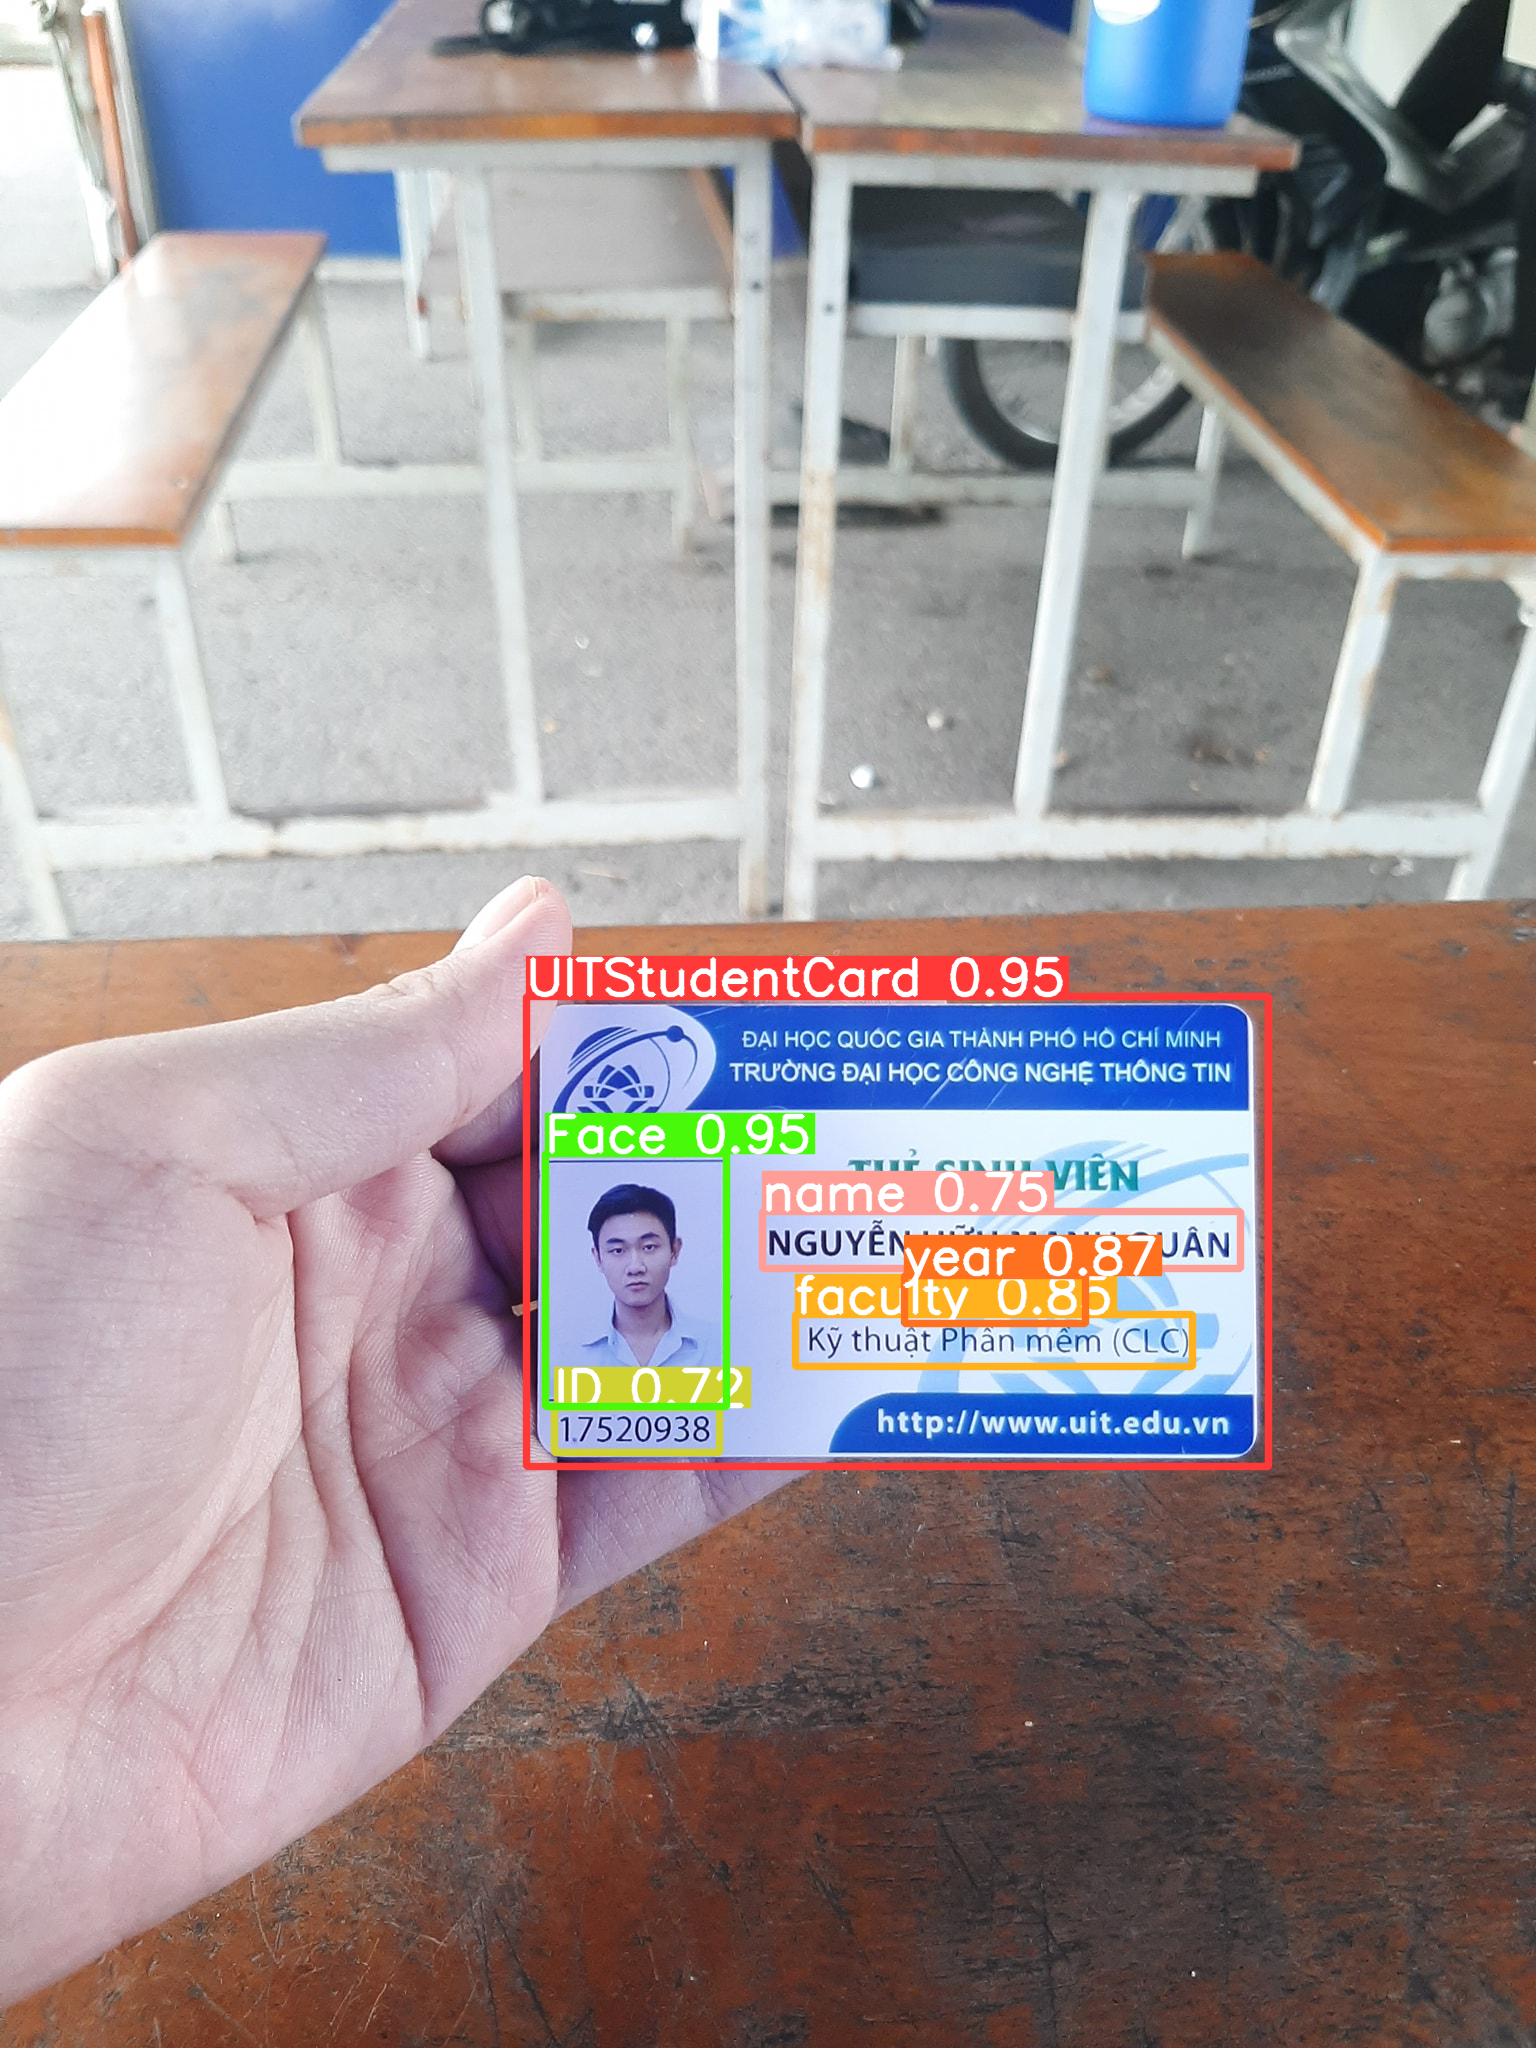

In [19]:
res_plotted = results[0].plot()
cv2_imshow(res_plotted)

In [27]:
from PIL import Image

In [31]:
image = Image.open(src)
img_array = np.array(image) # if you want to pass it to OpenCV

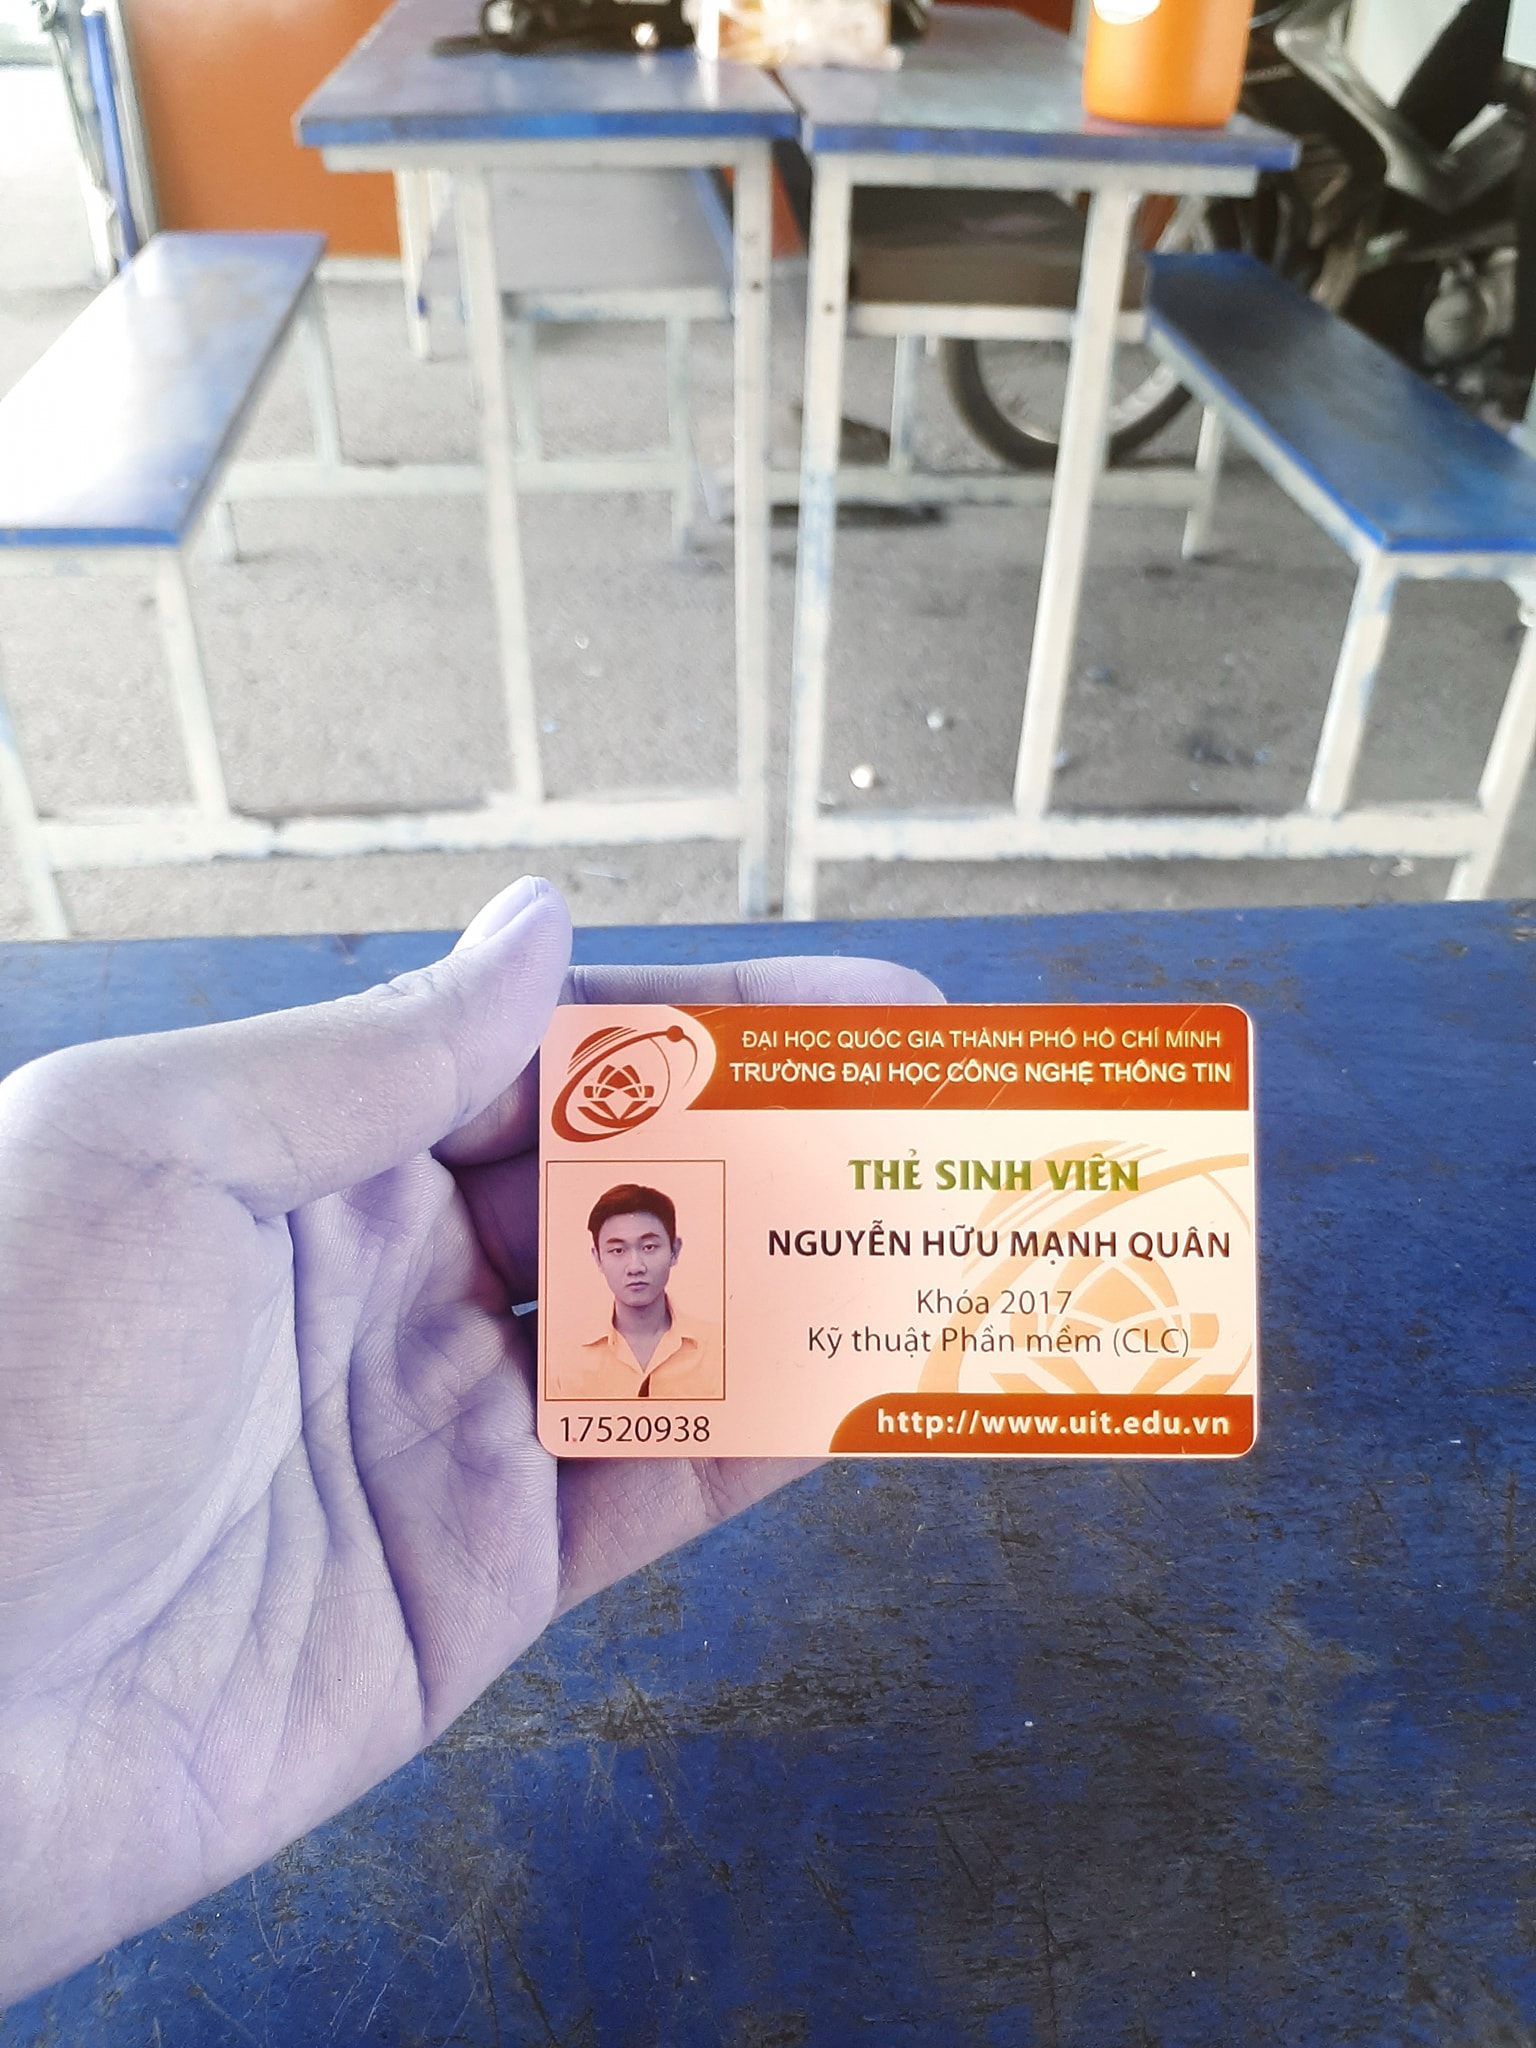

In [32]:
cv2_imshow(img_array)

In [46]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [47]:
! pip install --quiet vietocr

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 9.4 MB/s eta 0:00:00


In [48]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

In [50]:
config = Cfg.load_config_from_name('vgg_transformer')

In [51]:
detector = Predictor(config)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:03<00:00, 179MB/s]
18533it [00:13, 1355.89it/s]


In [52]:
for i in range(len(boxes)):
            if boxes.cls[i] == 1:
                name_arr = img_array[int(boxes.xyxy[i][1]):int(boxes.xyxy[i][3]),int(boxes.xyxy[i][0]):int(boxes.xyxy[i][2])]
                name_img = Image.fromarray(name_arr)
                name_text = detector.predict(name_img)
            elif boxes.cls[i] == 2:
                year_arr = img_array[int(boxes.xyxy[i][1]):int(boxes.xyxy[i][3]),int(boxes.xyxy[i][0]):int(boxes.xyxy[i][2])]
                year_img = Image.fromarray(year_arr)
                year_text = detector.predict(year_img)
            elif boxes.cls[i] == 3:
                faculty_arr = img_array[int(boxes.xyxy[i][1]):int(boxes.xyxy[i][3]),int(boxes.xyxy[i][0]):int(boxes.xyxy[i][2])]
                faculty_img = Image.fromarray(faculty_arr)
                faculty_text = detector.predict(faculty_img)
            elif boxes.cls[i] == 4:
                ID_arr = img_array[int(boxes.xyxy[i][1]):int(boxes.xyxy[i][3]),int(boxes.xyxy[i][0]):int(boxes.xyxy[i][2])]
                ID_img = Image.fromarray(ID_arr)
                ID_text = detector.predict(ID_img)
            elif boxes.cls[i] == 5:
                face_arr = img_array[int(boxes.xyxy[i][1]):int(boxes.xyxy[i][3]),int(boxes.xyxy[i][0]):int(boxes.xyxy[i][2])]
                face_img = Image.fromarray(face_arr)

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:5373: UserWarning: Memory Efficient attention is a non-deterministic algorithm. To explicitly disable Memory Efficient attention call torch.use_deterministic_algorithms(True, warn_only=False). (Triggered internally at ../aten/src/ATen/native/transformers/cuda/sdp_utils.h:419.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


In [59]:
print('name ',name_text)
print('year: ',year_text)
print('faculty: ',faculty_text)
print('ID: ',ID_text)

name  NGUYỄN HỮU MANH QUÂN
year:  Khóa 2017
faculty:  Kỹ thuật Phần mềm (CLC
ID:  17520938


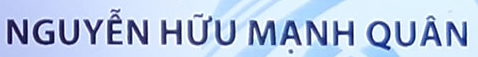

In [58]:
name_img

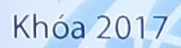

In [54]:
year_img

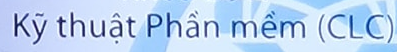

In [55]:
faculty_img

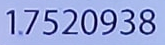

In [56]:
ID_img

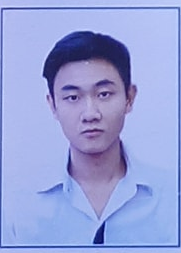

In [57]:
face_img